In [1]:
import torch
import torch.nn as nn
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torch.optim import SGD
import numpy as np
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [2]:
transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Lambda(lambda x: x.view(-1)) # flattens the data
])

In [3]:
batch_size = 64

trainset = datasets.MNIST(root='./data', train=True,
                                        download=True, transform=transforms)
trainloader = DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = datasets.MNIST(root='./data', train=False,
                                       download=True, transform=transforms)
testloader = DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

In [4]:
trainset[0][0].shape # input features

torch.Size([784])

In [5]:
# No. of samples in trainset
len(trainloader) * batch_size

60032

In [6]:
# No. of samples in testset
len(testloader) * batch_size

10048

In [15]:
class SoftmaxRegNoHidden(nn.Module):
    def __init__(self, x_dim,y_dim):
        super(SoftmaxRegNoHidden,self).__init__()
        self.linear1 = nn.Linear(x_dim,y_dim)
    def forward(self,X):
        X = self.linear1(X)
        return X

In [16]:
class SoftmaxRegHidden(nn.Module):
    def __init__(self, x_dim,hidden_dim,y_dim):
        super(SoftmaxRegHidden,self).__init__()
        self.linear1 = nn.Linear(x_dim,hidden_dim)
        self.linear2 = nn.Linear(hidden_dim,y_dim)
    def forward(self,X):
        X = self.linear1(X)
        X = self.linear2(X)
        return X

In [26]:
class SoftmaxRegHiddenWithActivation(nn.Module):
    def __init__(self, x_dim,hidden_dim,y_dim):
        super(SoftmaxRegHiddenWithActivation,self).__init__()
        self.linear1 = nn.Linear(x_dim,hidden_dim)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hidden_dim,y_dim)
    def forward(self,X):
        X = self.linear1(X)
        X = self.relu(X)
        X = self.linear2(X)
        return X

In [18]:
x_dim = trainset[0][0].shape[0]
y_dim = 10
hidden_dim = 128
epochs = 50
lr = 0.001

In [19]:
model_without_hidden_layer = SoftmaxRegNoHidden(x_dim,y_dim)
criterion1 = nn.CrossEntropyLoss()
optimizer1 = SGD(model_without_hidden_layer.parameters(),lr=lr)
losses1 = []
accuracy1 = []

In [20]:
print("TRAINING MODEL WITH NO HIDDEN LAYERS")
for epoch in range(epochs):
    epoch_loss = 0
    for i ,(xi,yi)in enumerate(trainloader):

        output = model_without_hidden_layer(xi)
        loss = criterion1(output,yi)
        
        optimizer1.zero_grad()
        loss.backward()
        optimizer1.step()
        
        epoch_loss += loss.item()
    avg_loss = epoch_loss / len(trainloader)
    losses1.append(avg_loss)
    print(f'Epoch {epoch + 1}/{epochs}, Loss: {avg_loss}')

TRAINING MODEL WITH NO HIDDEN LAYERS
Epoch 1/50, Loss: 1.9419276619008354
Epoch 2/50, Loss: 1.41310389616342
Epoch 3/50, Loss: 1.136451278223412
Epoch 4/50, Loss: 0.975292825431966
Epoch 5/50, Loss: 0.8709647070878604
Epoch 6/50, Loss: 0.7979537776029949
Epoch 7/50, Loss: 0.7437133578730545
Epoch 8/50, Loss: 0.7017891503918146
Epoch 9/50, Loss: 0.6680261772324536
Epoch 10/50, Loss: 0.6404850870561498
Epoch 11/50, Loss: 0.6174615752468231
Epoch 12/50, Loss: 0.597688619166549
Epoch 13/50, Loss: 0.5807117069962182
Epoch 14/50, Loss: 0.5657477277174179
Epoch 15/50, Loss: 0.5525727046768802
Epoch 16/50, Loss: 0.5409216998355475
Epoch 17/50, Loss: 0.5303962215113995
Epoch 18/50, Loss: 0.5209106548762779
Epoch 19/50, Loss: 0.5122122875790098
Epoch 20/50, Loss: 0.5043554239308656
Epoch 21/50, Loss: 0.49712651102209904
Epoch 22/50, Loss: 0.49050274882108164
Epoch 23/50, Loss: 0.4841406806699757
Epoch 24/50, Loss: 0.4782576497270863
Epoch 25/50, Loss: 0.47311978212106964
Epoch 26/50, Loss: 0.467

In [21]:
PATH = './mnist-no-hidden-layer.pth'
torch.save(model_without_hidden_layer.state_dict(), PATH)

In [22]:
model_with_hidden_layer = SoftmaxRegHidden(x_dim,hidden_dim,y_dim)
criterion2 = nn.CrossEntropyLoss()
optimizer2 = SGD(model_with_hidden_layer.parameters(),lr=lr)
losses2 = []
accuracy2 = []

In [23]:
for epoch in range(epochs):
    epoch_loss = 0
    for i ,(xi,yi)in enumerate(trainloader):

        output = model_with_hidden_layer(xi)
        loss = criterion2(output,yi)
        
        optimizer2.zero_grad()
        loss.backward()
        optimizer2.step()
        
        epoch_loss += loss.item()
    avg_loss = epoch_loss / len(trainloader)
    losses2.append(avg_loss)
    print(f'Epoch {epoch + 1}/{epochs}, Loss: {avg_loss}')

Epoch 1/50, Loss: 2.1225724808697
Epoch 2/50, Loss: 1.7476523700299293
Epoch 3/50, Loss: 1.3931806421737427
Epoch 4/50, Loss: 1.1188939554350716
Epoch 5/50, Loss: 0.932342430485337
Epoch 6/50, Loss: 0.8075300169143595
Epoch 7/50, Loss: 0.7207779402036403
Epoch 8/50, Loss: 0.6581981755268853
Epoch 9/50, Loss: 0.6108957488081856
Epoch 10/50, Loss: 0.5742338945997804
Epoch 11/50, Loss: 0.5447421714758822
Epoch 12/50, Loss: 0.5207179808603929
Epoch 13/50, Loss: 0.5006628179156196
Epoch 14/50, Loss: 0.483926509711534
Epoch 15/50, Loss: 0.4693701825162241
Epoch 16/50, Loss: 0.4570055439083307
Epoch 17/50, Loss: 0.4460941324356014
Epoch 18/50, Loss: 0.43656715235984656
Epoch 19/50, Loss: 0.4278906405385115
Epoch 20/50, Loss: 0.4203922794953084
Epoch 21/50, Loss: 0.4136344206326806
Epoch 22/50, Loss: 0.40738925196405157
Epoch 23/50, Loss: 0.4016008589948927
Epoch 24/50, Loss: 0.39645624656412903
Epoch 25/50, Loss: 0.39168434463012447
Epoch 26/50, Loss: 0.3874232866553101
Epoch 27/50, Loss: 0.3

In [24]:
PATH = './mnist-with-hidden-layer.pth'
torch.save(model_with_hidden_layer.state_dict(), PATH)

In [27]:
model_with_hidden_act_layer = SoftmaxRegHiddenWithActivation(x_dim,hidden_dim,y_dim)
criterion3 = nn.CrossEntropyLoss()
optimizer3 = SGD(model_with_hidden_act_layer.parameters(),lr=lr)
losses3 = []
accuracy3 = []

In [28]:
for epoch in range(epochs):
    epoch_loss = 0
    for i ,(xi,yi)in enumerate(trainloader):

        output = model_with_hidden_act_layer(xi)
        loss = criterion3(output,yi)
        
        optimizer3.zero_grad()
        loss.backward()
        optimizer3.step()
        
        epoch_loss += loss.item()
    avg_loss = epoch_loss / len(trainloader)
    losses3.append(avg_loss)
    print(f'Epoch {epoch + 1}/{epochs}, Loss: {avg_loss}')

Epoch 1/50, Loss: 2.244756853148373
Epoch 2/50, Loss: 2.054769087193617
Epoch 3/50, Loss: 1.7911311713363063
Epoch 4/50, Loss: 1.4927672084206458
Epoch 5/50, Loss: 1.2255854957393493
Epoch 6/50, Loss: 1.0229650074993368
Epoch 7/50, Loss: 0.8796898496430566
Epoch 8/50, Loss: 0.778190896963514
Epoch 9/50, Loss: 0.7043329044572835
Epoch 10/50, Loss: 0.6484521640770471
Epoch 11/50, Loss: 0.6050386866018462
Epoch 12/50, Loss: 0.570412243638974
Epoch 13/50, Loss: 0.5421171179458276
Epoch 14/50, Loss: 0.5184981390230183
Epoch 15/50, Loss: 0.49861792115959275
Epoch 16/50, Loss: 0.48179473850264476
Epoch 17/50, Loss: 0.467037610360173
Epoch 18/50, Loss: 0.4541821921748647
Epoch 19/50, Loss: 0.44270374967472387
Epoch 20/50, Loss: 0.4326477158806726
Epoch 21/50, Loss: 0.423716209892398
Epoch 22/50, Loss: 0.41554890615917217
Epoch 23/50, Loss: 0.4082167242476935
Epoch 24/50, Loss: 0.4016835486996911
Epoch 25/50, Loss: 0.39541034155817173
Epoch 26/50, Loss: 0.3898293280334615
Epoch 27/50, Loss: 0.3

In [29]:
PATH = './mnist-hidden-act-layer.pth'
torch.save(model_with_hidden_act_layer.state_dict(), PATH)

Text(0, 0.5, 'Loss')

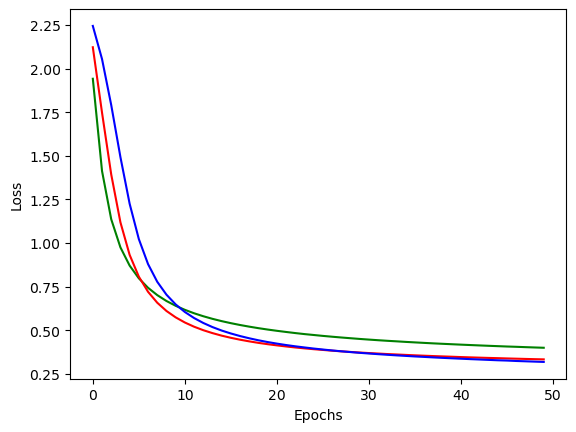

In [30]:
plt.plot(range(epochs),losses1,label = 'without hidden layer',c='g')
plt.plot(range(epochs),losses2,label = 'with hidden layer',c='r')
plt.plot(range(epochs),losses3,label = 'with hidden and activation layer',c='b')
plt.xlabel('Epochs')
plt.ylabel('Loss')

In [31]:
model_without_hidden_layer.eval()
y_pred = np.array([])
y_true = np.array([])
with torch.no_grad(): 
    for xi, yi in testloader:
        output = model_without_hidden_layer(xi)
        _,y_pred_tensor = torch.max(output,1)
        y_pred = np.hstack((y_pred,y_pred_tensor.numpy()))
        y_true = np.hstack((y_true,yi.numpy()))

print("CLASSIFICATION REPORT FOR MODEL WITHOUT HIDDEN LAYERS")
print(classification_report(y_pred=y_pred,y_true=y_true))


CLASSIFICATION REPORT FOR MODEL WITHOUT HIDDEN LAYERS
              precision    recall  f1-score   support

         0.0       0.93      0.98      0.95       980
         1.0       0.95      0.97      0.96      1135
         2.0       0.91      0.86      0.88      1032
         3.0       0.88      0.89      0.89      1010
         4.0       0.89      0.91      0.90       982
         5.0       0.88      0.82      0.85       892
         6.0       0.92      0.93      0.93       958
         7.0       0.91      0.89      0.90      1028
         8.0       0.85      0.86      0.85       974
         9.0       0.86      0.87      0.87      1009

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [32]:
model_with_hidden_layer.eval()
y_pred = np.array([])
y_true = np.array([])
with torch.no_grad(): 
    for xi, yi in testloader:
        output = model_with_hidden_layer(xi)
        _,y_pred_tensor = torch.max(output,1)
        y_pred = np.hstack((y_pred,y_pred_tensor.numpy()))
        y_true = np.hstack((y_true,yi.numpy()))

print("CLASSIFICATION REPORT FOR MODEL WITH HIDDEN LAYERS")
print(classification_report(y_pred=y_pred,y_true=y_true))


CLASSIFICATION REPORT FOR MODEL WITH HIDDEN LAYERS
              precision    recall  f1-score   support

         0.0       0.94      0.98      0.96       980
         1.0       0.96      0.97      0.97      1135
         2.0       0.92      0.88      0.90      1032
         3.0       0.89      0.90      0.89      1010
         4.0       0.90      0.92      0.91       982
         5.0       0.88      0.84      0.86       892
         6.0       0.93      0.94      0.94       958
         7.0       0.92      0.91      0.91      1028
         8.0       0.86      0.87      0.87       974
         9.0       0.88      0.88      0.88      1009

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [33]:
model_with_hidden_act_layer.eval()
y_pred = np.array([])
y_true = np.array([])
with torch.no_grad(): 
    for xi, yi in testloader:
        output = model_with_hidden_act_layer(xi)
        _,y_pred_tensor = torch.max(output,1)
        y_pred = np.hstack((y_pred,y_pred_tensor.numpy()))
        y_true = np.hstack((y_true,yi.numpy()))

print("CLASSIFICATION REPORT FOR MODEL WITH HIDDEN AND ACTIVATION LAYERS")
print(classification_report(y_pred=y_pred,y_true=y_true))


CLASSIFICATION REPORT FOR MODEL WITH HIDDEN AND ACTIVATION LAYERS
              precision    recall  f1-score   support

         0.0       0.94      0.98      0.96       980
         1.0       0.96      0.97      0.97      1135
         2.0       0.92      0.88      0.90      1032
         3.0       0.90      0.90      0.90      1010
         4.0       0.90      0.93      0.91       982
         5.0       0.89      0.85      0.87       892
         6.0       0.93      0.94      0.94       958
         7.0       0.93      0.92      0.92      1028
         8.0       0.86      0.87      0.87       974
         9.0       0.90      0.88      0.89      1009

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

